# Sentiment analysis | Depp vs Heard

## Data extraction

Twitter extraction by keywords

### Imports

In [718]:
import tweepy as tw
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob

from wordcloud import WordCloud
import matplotlib.pyplot as plt

from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gonzalozabala/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/gonzalozabala/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### Twitter authentificathion

In [719]:
ACCESS_KEY = ""
ACCESS_SECRET = ""
CONSUMER_KEY= ''
CONSUMER_SECRET= ''
BEARER = ""

In [720]:
import tweepy as tw
client = tw.Client(bearer_token=BEARER) 

### Tweets extraction

In [721]:
tag = 'tomorrow'
query = '#'+ tag +' -is:retweet lang:en'
tweets = client.search_recent_tweets(query=query, tweet_fields=['created_at'], max_results=100)

In [722]:
import pandas as pd

tweets_df = pd.DataFrame(tweets.data)
tweets_df

,created_at,id,text
0,2022-06-03 10:57:02+00:00,1532677734497153024,when the quality is 144p but you're #JOONGRYEON \n\n#JOONGRYEONWEEK #Tomorrow #KimHeeSun #KimHeeSeon #LeeSooHyuk #GuRyeon #KooRyeon #ParkJoongGil https://t.co/b7GyRi5O2l
1,2022-06-03 10:56:00+00:00,1532677473858506752,"""Yesterday is not ours to recover, but tomorrow is ours to win or lose."" - Lyndon B. Johnson\n\n#quote #MotivationalQuotes #Positive #tomorrow #life"
2,2022-06-03 10:40:46+00:00,1532673642592718849,"Indeed, #Allah [alone] has #knowledge of the #Hour and sends down the #rain and knows what is in the #wombs. And no #soul #perceives what it will earn #tomorrow, &amp; no soul perceives in what #land it will #die . Indeed, Allah is #Knowing and #Acquainted .\n\n#Quran\n31:34\n#islam."
3,2022-06-03 10:38:02+00:00,1532672952541622272,Hapag-Lloyd AG Global Management Meeting #GMM2022– finally in person again. Reflecting together on the last 175 years &amp; discussing #tomorrow's #potential is a wonderful part of coming together as a leadership team. Fantastically warm weather now with plen…https://t.co/zdiSXu1DBu
4,2022-06-03 10:36:55+00:00,1532672673137958913,"I know the show #Tomorrow supposed to be a fanatsy drama but how come it's all episodes become realistically so relatable, also the main and supporting casts,all the crew did amazing hope it'll get many awards in year end shows https://t.co/7jCtSl7Q6g"
5,2022-06-03 10:35:41+00:00,1532672360939401217,"SHUT UP 😂😂😂😂 \n\nROWOON, when i eat you &gt;&gt;&gt;\n\n#tomorrowep1 #tomorrow https://t.co/6Zwz3HprMt"
6,2022-06-03 10:33:10+00:00,1532671730182803457,"""How many times did we pass each other before we met? If only I’d known…. I would have searched for you endlessly.""\n\nPart 1.3 ""Right person, wrong time""\n\nThe Swoon Netflix already joined the #JOONGRYEONWEEK\n#JoongRyeon #Tomorrow\n❤️❤️❤️\n\nhttps://t.co/2Sp45VM6Q9 https://t.co/mo9ySheYCO"
7,2022-06-03 10:25:13+00:00,1532669727406972928,"""It might've been just a moment for you, but for me, it's been a lifetime. The trauma"". 🥀🍁\n#noheunbi #Tomorrow https://t.co/zUiaxS6Tjp"
8,2022-06-03 10:15:00+00:00,1532667156361527296,"SMART PASSIVE EARNINGS\n\nRenewable power for a cleaner, brighter tomorrow\nHydro Wind Solar Distributed-Generation Storage\n\n https://t.co/j8RfNLfawB \n\n#environment #tomorrow #Renewable #power #solar #hydro #wind #storage #pam #palm #alliance #management https://t.co/dqOmVbMP2p"
9,2022-06-03 10:13:15+00:00,1532666714869334016,Due #tomorrow = Do tomorrow.| #TeamFollowBack #Procrastination


### Data pre-processing

Remove tags, links, rt, break lines, and puntuactions

https://towardsdatascience.com/selenium-tweepy-to-scrap-tweets-from-tweeter-and-analysing-sentiments-1804db3478ac

In [723]:
tags = "\B@\w+"
rt = 'RT'
links = "\S*https?:\S*"
break_line = "\n"
puntuaction = '[^\w\s]'

patterns_to_delete = [tags, rt, links, break_line, puntuaction]
patterns_to_delete

['\\B@\\w+', 'RT', '\\S*https?:\\S*', '\n', '[^\\w\\s]']

In [724]:
for pattern in patterns_to_delete:
    tweets_df['text'] = tweets_df['text'].str.replace(pattern, '', regex=True)

Removing stop words

In [725]:
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')

tweets_df['text'] = tweets_df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

Tokenization and lemmatization:

In [726]:
from nltk.stem import WordNetLemmatizer

# Tokenization
tokenized_tweet = tweets_df['text'].apply(lambda x: x.split())

# Lemmatization
word_lemmatizer = WordNetLemmatizer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])

#List of words to strings
for i, tokens in enumerate(tokenized_tweet):
    tokenized_tweet[i] = ' '.join(tokens)

tweets_df['text'] = tokenized_tweet

Delete duplicates

In [727]:
tweets_df.drop_duplicates(inplace=True, subset=["text"])
tweets_df

,created_at,id,text
0,2022-06-03 10:57:02+00:00,1532677734497153024,quality 144p youre JOONGRYEON JOONGRYEONWEEK Tomorrow KimHeeSun KimHeeSeon LeeSooHyuk GuRyeon KooRyeon ParkJoongGil
1,2022-06-03 10:56:00+00:00,1532677473858506752,Yesterday recover tomorrow win lose Lyndon B Johnsonquote MotivationalQuotes Positive tomorrow life
2,2022-06-03 10:40:46+00:00,1532673642592718849,Indeed Allah alone knowledge Hour sends rain know womb And soul perceives earn tomorrow amp soul perceives land die Indeed Allah Knowing Acquainted Quran3134islam
3,2022-06-03 10:38:02+00:00,1532672952541622272,HapagLloyd AG Global Management Meeting GMM2022 finally person Reflecting together last 175 year amp discussing tomorrow potential wonderful part coming together leadership team Fantastically warm weather
4,2022-06-03 10:36:55+00:00,1532672673137958913,I know show Tomorrow supposed fanatsy drama come episode become realistically relatable also main supporting castsall crew amazing hope itll get many award year end show
5,2022-06-03 10:35:41+00:00,1532672360939401217,SHUT UP ROWOON eat gtgtgttomorrowep1 tomorrow
6,2022-06-03 10:33:10+00:00,1532671730182803457,How many time pas met If Id known I would searched endlesslyPart 13 Right person wrong timeThe Swoon Netflix already joined JOONGRYEONWEEKJoongRyeon Tomorrow
7,2022-06-03 10:25:13+00:00,1532669727406972928,It mightve moment lifetime The trauma noheunbi Tomorrow
8,2022-06-03 10:15:00+00:00,1532667156361527296,SMA PASSIVE EARNINGSRenewable power cleaner brighter tomorrowHydro Wind Solar DistributedGeneration Storage environment tomorrow Renewable power solar hydro wind storage pam palm alliance management
9,2022-06-03 10:13:15+00:00,1532666714869334016,Due tomorrow Do tomorrow TeamFollowBack Procrastination


### Visualization

Wordcloud

In [728]:
text = " ".join(review for review in tweets_df.text.astype(str))

In [729]:
wordcloud = WordCloud(background_color="white", width=500, height=500).generate(text)

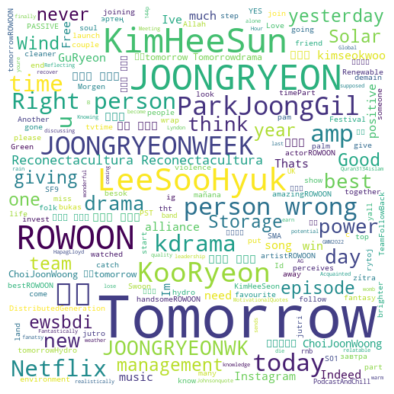

In [730]:

# Display the generated image:
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")
plt.show()


### Model

In [731]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
def apply_sia(text):
    sia = SentimentIntensityAnalyzer()
    polarity_scores = sia.polarity_scores(text)
    if polarity_scores['neu'] == 1.0:
        return "Neutral tweet"
    else:
        if polarity_scores['pos'] > polarity_scores['neg']:
            return "Positive tweet" 
        else:
            return "Negative tweet"

def apply_tb(text):
    analysis = TextBlob(text)
    # set sentiment 
    if analysis.sentiment.polarity >= 0:
        return 'positive'
    else: 
        return 'negative'

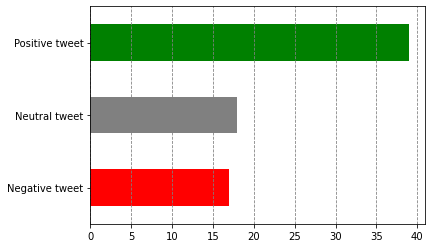

In [732]:
sentiments_nltk = pd.DataFrame(columns=['Tweet', 'Sentiment'])
for index, row in tweets_df.iterrows():
    df_length = len(sentiments_nltk)
    sentiments_nltk.loc[df_length] = [row['text'], apply_sia(row['text'])]
sentiments_nltk

sentiments_nltk['Sentiment'].value_counts().sort_index().plot(   kind='barh', 
                                                    color=['red', 'grey', 'green']).grid(   color='gray', 
                                                                                            linestyle='dashed', 
                                                                                            axis='x')

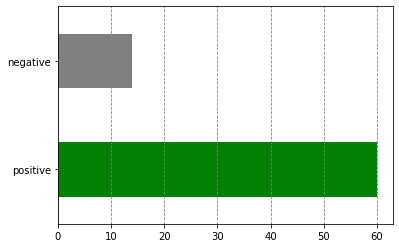

In [733]:
sentiments_nltk = pd.DataFrame(columns=['Tweet', 'Sentiment'])
for index, row in tweets_df.iterrows():
    df_length = len(sentiments_nltk)
    sentiments_nltk.loc[df_length] = [row['text'], apply_tb(row['text'])]
sentiments_nltk

sentiments_nltk['Sentiment'].value_counts().plot(   kind='barh', 
                                                    color=['green', 'grey', 'red']).grid(   color='gray', 
                                                                                            linestyle='dashed', 
                                                                                            axis='x')